In [1]:
import pandas as pd
import numpy as np

In [2]:
import re
import datetime
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
train = pd.read_csv('updated_train.csv', encoding = "ISO-8859-1")
train.head()

,backers_count,country,created_at,currency,deadline,desc,disable_communication,goal,keywords,launched_at,...,28,29,30,31,name_len,name_count,desc_len,desc_count,keywords_len,keywords_count
0,3,20,1240600507,8,1241333999,I like drawing pictures. and then i color them...,1,20.0,drawing-for-dollars,1240602723,...,0,0,0,0,19,3,134,26,19,3
1,2,20,1240960224,8,1242429000,"I, Dereck Blackburn will be taking upon an inc...",1,300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,1240975592,...,0,1,0,0,76,10,137,25,74,10
2,0,20,1242163613,8,1243027560,So I saw darkpony's successfully funded drawin...,1,30.0,mr-squiggles,1242164398,...,0,0,0,0,13,2,385,22,12,2
3,18,20,1240963795,8,1243555740,Do your part to help out starving artists and ...,1,500.0,help-me-write-my-second-novel,1240966730,...,0,1,0,0,30,6,131,23,29,6
4,1,20,1241177914,8,1243769880,"I'm nearing completion on a sculpture, current...",1,2000.0,support-casting-my-sculpture-in-bronze,1241180541,...,0,0,0,0,38,6,384,18,38,6


In [5]:
test = pd.read_csv('updated_test.csv', encoding = "ISO-8859-1")
test.head()

,backers_count,country,created_at,currency,deadline,desc,disable_communication,goal,keywords,launched_at,...,28,29,30,31,name_len,name_count,desc_len,desc_count,keywords_len,keywords_count
0,NaN,20,1446002581,8,1449619185,"My first film, of many to come. Trying to purs...",1,7000.0,brathair,1446159585,...,0,0,1,0,9,1,119,19,8,1
1,NaN,20,1450297323,8,1453435620,A young man that has earned his master's in sc...,1,35000.0,the-screenwriter,1450411620,...,0,0,0,0,16,2,119,20,16,2
2,NaN,20,1448581356,8,1451780700,Film about a high school constructed for negro...,1,49500.0,the-hornets-nest-the-fairmont-heights-story,1448672128,...,1,0,0,0,43,7,126,19,43,7
3,NaN,20,1440966830,8,1445021518,The acclaimed series about a group of transgen...,1,40000.0,brothers-season-2-groundbreaking-transgender-male,1442429518,...,0,0,0,0,58,8,108,17,49,6
4,NaN,20,1455765276,8,1462068840,Blackdom's history offers a new narrative tha...,1,20000.0,blackdom-the-movie,1458334890,...,0,0,0,0,18,3,132,21,18,3


In [6]:
import time
import calendar, datetime

In [7]:
datetime.datetime.utcfromtimestamp(train.loc[0,'deadline'])

datetime.datetime(2009, 5, 3, 6, 59, 59)

In [8]:
train['launched_at'] = train['launched_at'].apply(lambda x :datetime.datetime.utcfromtimestamp(x))
train['deadline'] = train['deadline'].apply(lambda x :datetime.datetime.utcfromtimestamp(x))

In [9]:
train['diff'] = train['deadline'] - train['launched_at']

In [10]:
def update(x):
    y = divmod(x.days * 86400 + x.seconds, 60)
    return y[0]+y[1]/60

In [11]:
train['diff'] = train['diff'].apply(lambda x:update(x))

In [12]:
train['diff'].head()

0    12187.933333
1    24223.466667
2    14386.033333
3    43150.166667
4    43155.650000
Name: diff, dtype: float64

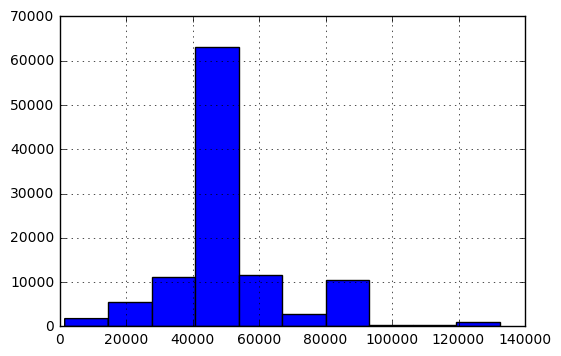

In [13]:
train['diff'].hist()

In [14]:
target = pd.read_csv('train.csv')
target = target['final_status']

In [15]:
train['final_status'] = target

{'boxes': [<matplotlib.lines.Line2D at 0x208c384c208>],
 'caps': [<matplotlib.lines.Line2D at 0x208c383fe48>,
 'fliers': [<matplotlib.lines.Line2D at 0x208c383afd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x208c383a828>],
 'whiskers': [<matplotlib.lines.Line2D at 0x208c384cdd8>,
  <matplotlib.lines.Line2D at 0x208c384cf60>]}

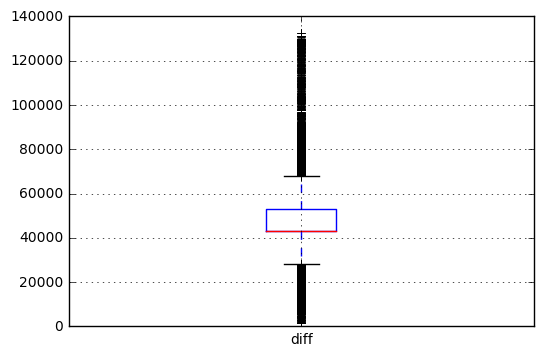

In [16]:
train.boxplot(column='diff',return_type='dict')

In [17]:
train['state_changed_at'] = train['state_changed_at'].apply(lambda x :datetime.datetime.utcfromtimestamp(x))
train['diff1'] = train['state_changed_at'] - train['deadline']
train['diff1'] = train['diff1'].apply(lambda x:update(x))
train['diff1'].head()

0     0.300000
1    50.300000
2     4.300000
3     6.350000
4     7.283333
Name: diff1, dtype: float64

In [18]:
train['created_at'] = train['created_at'].apply(lambda x :datetime.datetime.utcfromtimestamp(x))
train['diff2'] = train['launched_at'] - train['created_at']
train['diff2'] = train['diff2'].apply(lambda x:update(x))
train['diff2'].head()

0     36.933333
1    256.133333
2     13.083333
3     48.916667
4     43.783333
Name: diff2, dtype: float64

In [19]:
test['launched_at'] = test['launched_at'].apply(lambda x :datetime.datetime.utcfromtimestamp(x))
test['deadline'] = test['deadline'].apply(lambda x :datetime.datetime.utcfromtimestamp(x))
test['diff'] = test['deadline'] - test['launched_at']
test['diff'] = test['diff'].apply(lambda x:update(x))
test['diff'].head()

0    57660.000000
1    50400.000000
2    51809.533333
3    43200.000000
4    62232.500000
Name: diff, dtype: float64

In [20]:
test['state_changed_at'] = test['state_changed_at'].apply(lambda x :datetime.datetime.utcfromtimestamp(x))
test['diff1'] = test['state_changed_at'] - test['deadline']
test['diff1'] = test['diff1'].apply(lambda x:update(x))
test['diff1'].head()

0    0.000000
1    0.000000
2    0.000000
3    0.200000
4    0.066667
Name: diff1, dtype: float64

In [21]:
test['created_at'] = test['created_at'].apply(lambda x :datetime.datetime.utcfromtimestamp(x))
test['diff2'] = test['launched_at'] - test['created_at']
test['diff2'] = test['diff2'].apply(lambda x:update(x))
test['diff2'].head()

0     2616.733333
1     1904.950000
2     1512.866667
3    24378.133333
4    42826.900000
Name: diff2, dtype: float64

In [22]:
train.columns

Index(['backers_count', 'country', 'created_at', 'currency', 'deadline',
       'desc', 'disable_communication', 'goal', 'keywords', 'launched_at',
       'name', 'project_id', 'state_changed_at', 'd1', 'd2', 'd3', 'd4', 'd5',
       'd6', 'd7', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10',
       'm11', 'm12', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', 'name_len',
       'name_count', 'desc_len', 'desc_count', 'keywords_len',
       'keywords_count', 'diff', 'final_status', 'diff1', 'diff2'],
      dtype='object')

In [23]:
kickdesc = pd.Series(train['desc'].tolist() + test['desc'].tolist()).astype(str)

In [24]:
# this function cleans punctuations, digits and irregular tabs. Then converts the sentences to lower
def desc_clean(word):
    p1 = re.sub(pattern='(\W+)|(\d+)|(\s+)',repl=' ',string=word)
    p1 = p1.lower()
    return p1

kickdesc = kickdesc.map(desc_clean)

In [25]:
stop = set(stopwords.words('english'))
kickdesc = [[x for x in x.split() if x not in stop] for x in kickdesc]
stemmer = SnowballStemmer(language='english')
kickdesc = [[stemmer.stem(x) for x in x] for x in kickdesc]
kickdesc = [[x for x in x if len(x) > 2] for x in kickdesc]
kickdesc = [' '.join(x) for x in kickdesc]

In [26]:
# Due to memory error, limited the number of features to 650
cv = CountVectorizer(max_features=650)

In [27]:
alldesc = cv.fit_transform(kickdesc).todense()

In [28]:
#create a data frame
combine = pd.DataFrame(alldesc)
combine.rename(columns= lambda x: 'variable_'+ str(x), inplace=True)

In [29]:
#split the text features
train_text = combine[:train.shape[0]]
test_text = combine[train.shape[0]:]
test_text.reset_index(drop=True,inplace=True)

In [38]:
len(train_text.columns)

650

In [39]:
a = ['a','b']
b = ['c','d']
a+b

['a', 'b', 'c', 'd']

In [31]:
df = pd.concat([train, train_text],axis=1)

In [43]:
test = pd.concat([test, test_text],axis=1)

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [34]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.3.0-posix-seh-rt_v5-rev1\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost.sklearn import XGBClassifier

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df, df['final_status'], test_size=0.20, random_state=42)

In [40]:
features = ['name_len','goal','diff','diff1','diff2',
            'name_count', 'desc_len', 'desc_count', 'keywords_len',
            'keywords_count'] + list(train_text.columns)

In [41]:
X = X_train[features]
y = y_train
xgb = XGBClassifier()
xgb.fit(X,y)
pred = xgb.predict(X_test[features])
accuracy_score(y_test,pred)

0.70096180523444007

In [32]:
for i,j in zip(features,xgb.feature_importances_):
    print(i+" "+str(j))

name_len 0.0395683
goal 0.246403
diff 0.201439
diff1 0.165468
diff2 0.179856
name_count 0.0503597
desc_len 0.028777
desc_count 0.0647482
keywords_len 0.016187
keywords_count 0.00719424


In [44]:
pred = xgb.predict(test[features])

In [45]:
submission = pd.DataFrame({'project_id':test['project_id'],'final_status':pred})
submission = submission[['project_id','final_status']]
submission.to_csv("xgb.csv",index = False) #0.6526

In [46]:
submission.head()

,project_id,final_status
0,kkst917493670,0
1,kkst1664901914,0
2,kkst925125077,0
3,kkst1427645275,0
4,kkst1714249266,0
